Importing the dataset from google drive to Google Collab

In [ ]:
from zipfile import ZipFile

with ZipFile("/content/drive/MyDrive/data.zip",'r') as zipObj:
  zipObj.extractall("/content/input")

Here we are importing the necessary needed libraries for this task before performing for the data preparation.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

import os
import cv2

import matplotlib.pyplot as plt

**Creating Helper Function:**
This will work by iterating through the labels of the images that we will assign in the function.

Here it returns an array 0 and 1.

-->0 represents "MALE" and 1 represents "FEMALE"

In [ ]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

**Loading images:**

Here we load the image path to the function we created to iterate all over the images to find labels.

In [ ]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)
            
            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

Here we asign various directories/folders to use the loading data function on all the images.

In [ ]:
Real_path = "/content/input/data/Real"
Easy_path = "/content/input/data/Altered/Altered-Easy"
Medium_path = "/content/input/data/Altered/Altered-Medium"
Hard_path = "/content/input/data/Altered/Altered-Hard"

Easy_data = loading_data(Easy_path,True)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


Here we split the image arrays and image labels.

In [ ]:
img, labels = [], []
for label, feature in Easy_data:
    labels.append(label)
    img.append(feature)

In [ ]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0

In [ ]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(labels, num_classes = 2)

In [ ]:
labels = np.array(labels)

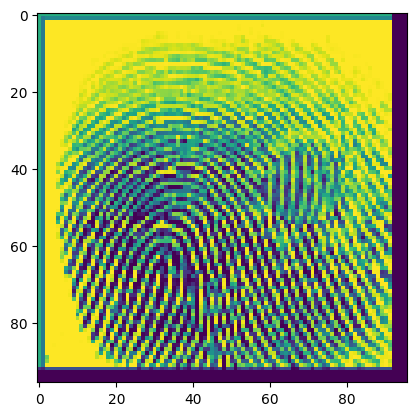

In [ ]:
plt.imshow(train_data[5000])

**Building CNN for Gender Classification Model:**

Here we have designed a CNN for our project.

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
type(labels)

numpy.ndarray

Here we fit our model, we are going to train the model for 24 epochs.

In [ ]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 24, 
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/24
113/113 [==============================] - 18s 45ms/step - loss: 0.7568 - accuracy: 0.7842 - val_loss: 0.4729 - val_accuracy: 0.8012
Epoch 2/24
113/113 [==============================] - 3s 25ms/step - loss: 0.4606 - accuracy: 0.7966 - val_loss: 0.4541 - val_accuracy: 0.8074
Epoch 3/24
113/113 [==============================] - 3s 23ms/step - loss: 0.4308 - accuracy: 0.8091 - val_loss: 0.4265 - val_accuracy: 0.8152
Epoch 4/24
113/113 [==============================] - 3s 24ms/step - loss: 0.3851 - accuracy: 0.8305 - val_loss: 0.3935 - val_accuracy: 0.8297
Epoch 5/24
113/113 [==============================] - 3s 25ms/step - loss: 0.3325 - accuracy: 0.8582 - val_loss: 0.3522 - val_accuracy: 0.8528
Epoch 6/24
113/113 [==============================] - 2s 22ms/step - loss: 0.2663 - accuracy: 0.8889 - val_loss: 0.3494 - val_accuracy: 0.8439
Epoch 7/24
113/113 [==============================] - 3s 22ms/step - loss: 0.2097 - accuracy: 0.9157 - val_loss: 0.2655 - val_accuracy: 0.889

**Testing Gender Classification model:**

As we split the training images into image labels and image arrays while training our model. Now we will repeat the same on the testing images.

In [ ]:
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

1000
2000
3000
4000
5000
6000


In [ ]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

**Evaluating the Performance of our CNN Model on the test set:**

In [ ]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 1s 5ms/step - loss: 4.7541 - accuracy: 0.9930


[4.754141330718994, 0.9929999709129333]

188/188 [==============================] - 1s 2ms/step
6000


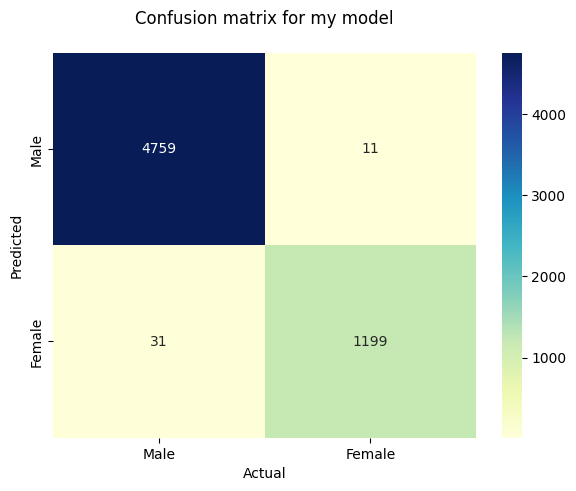

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for my model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))


**Saving our Trained model:**

In [ ]:
model.save('GenderFP.h5')

**Displaying the Output with the test data:**

1000
2000
3000
4000
5000
6000
Original O/P : Female
1/1 [==============================] - 0s 119ms/step
Predicted O/P : Female
1/1 [==============================] - 0s 20ms/step
[1.]


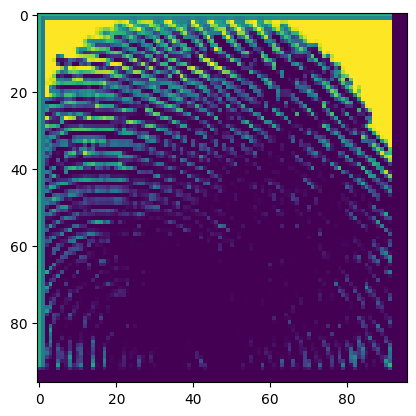

Original O/P : Male
1/1 [==============================] - 0s 22ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 21ms/step
[0.]


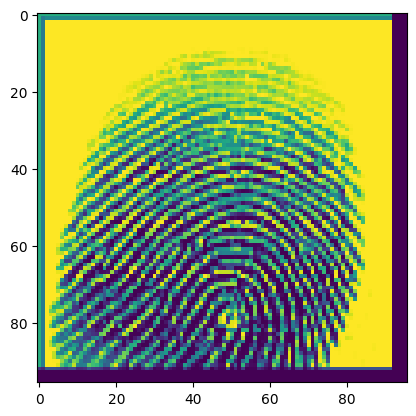

Original O/P : Male
1/1 [==============================] - 0s 20ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 19ms/step
[0.]


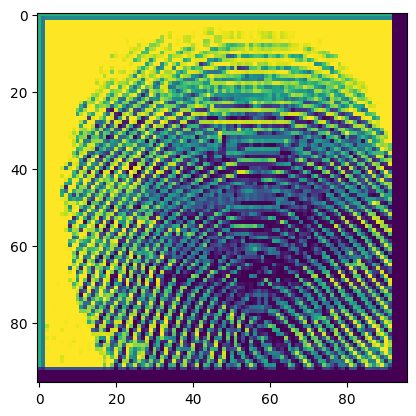

Original O/P : Male
1/1 [==============================] - 0s 17ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 19ms/step
[0.]


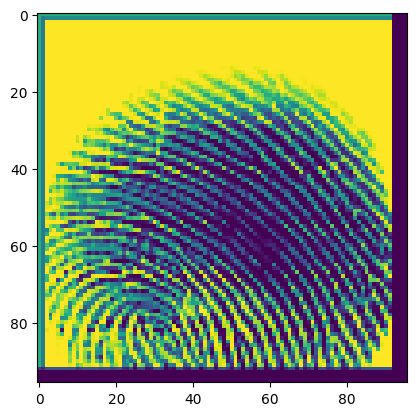

Original O/P : Male
1/1 [==============================] - 0s 23ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 18ms/step
[0.]


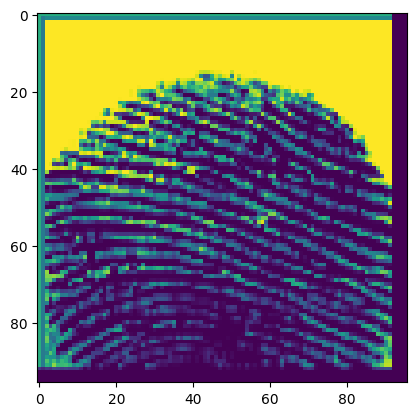

Original O/P : Male
1/1 [==============================] - 0s 17ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 19ms/step
[0.]


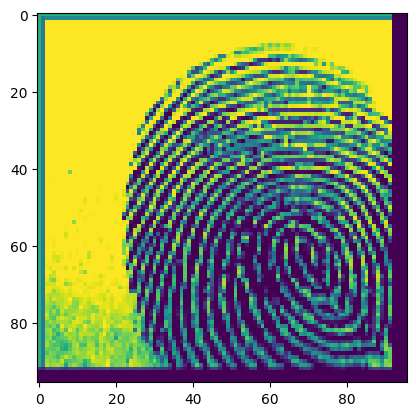

Original O/P : Female
1/1 [==============================] - 0s 19ms/step
Predicted O/P : Female
1/1 [==============================] - 0s 17ms/step
[1.]


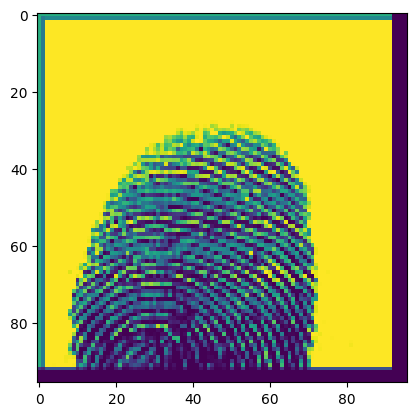

Original O/P : Male
1/1 [==============================] - 0s 17ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 17ms/step
[0.]


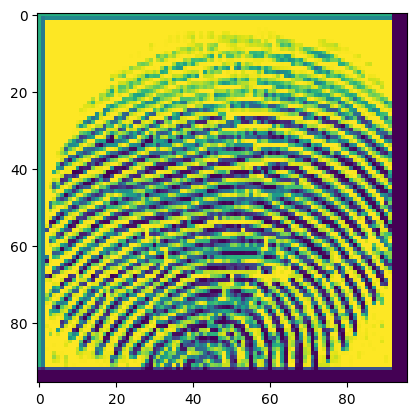

Original O/P : Male
1/1 [==============================] - 0s 18ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 18ms/step
[0.]


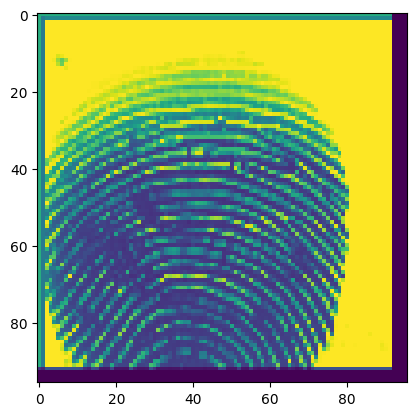

Original O/P : Male
1/1 [==============================] - 0s 19ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 18ms/step
[0.]


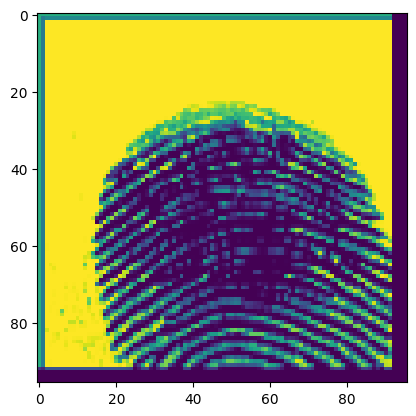

Original O/P : Male
1/1 [==============================] - 0s 20ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 20ms/step
[0.]


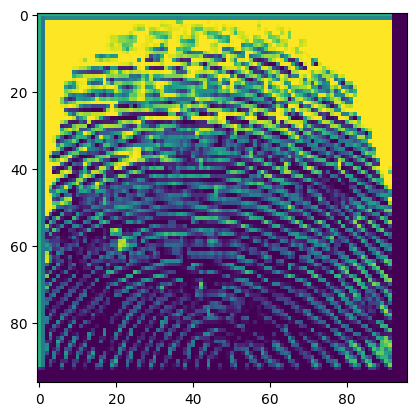

Original O/P : Female
1/1 [==============================] - 0s 18ms/step
Predicted O/P : Female
1/1 [==============================] - 0s 18ms/step
[1.]


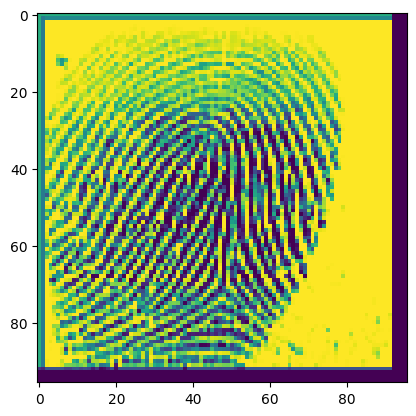

Original O/P : Female
1/1 [==============================] - 0s 19ms/step
Predicted O/P : Female
1/1 [==============================] - 0s 17ms/step
[1.]


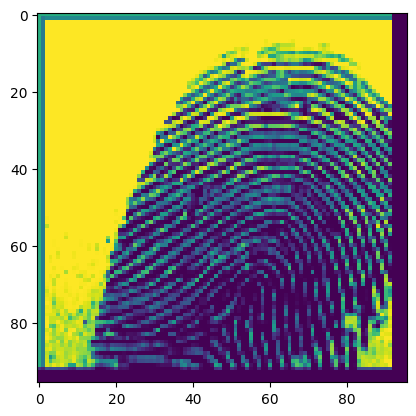

Original O/P : Male
1/1 [==============================] - 0s 18ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 17ms/step
[0.]


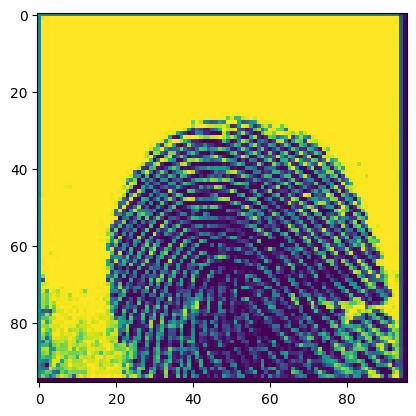

Original O/P : Male
1/1 [==============================] - 0s 19ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 18ms/step
[0.]


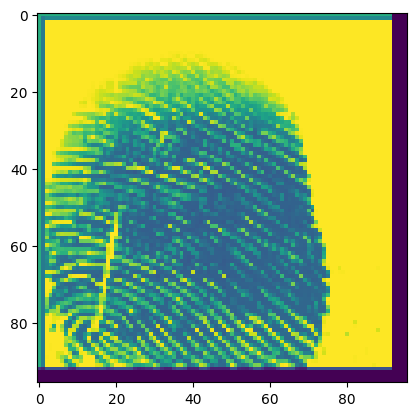

Original O/P : Male
1/1 [==============================] - 0s 24ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 29ms/step
[0.]


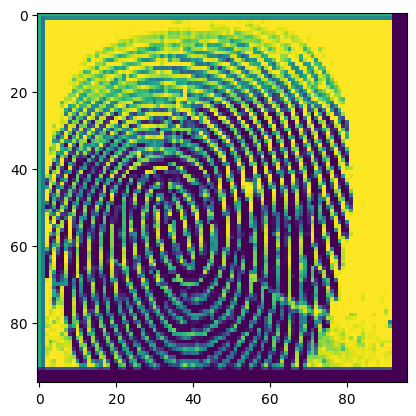

Original O/P : Male
1/1 [==============================] - 0s 20ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 22ms/step
[0.]


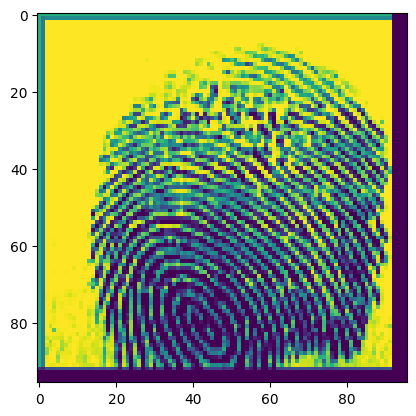

Original O/P : Male
1/1 [==============================] - 0s 18ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 18ms/step
[0.]


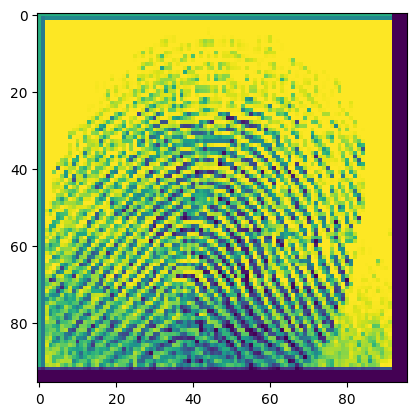

Original O/P : Female
1/1 [==============================] - 0s 18ms/step
Predicted O/P : Female
1/1 [==============================] - 0s 17ms/step
[1.]


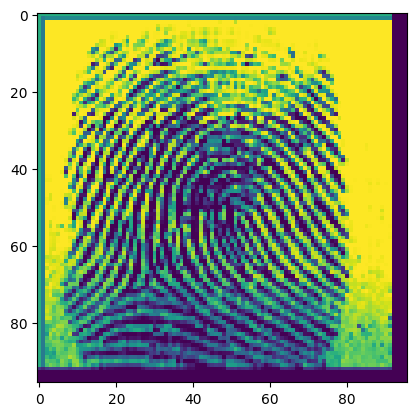

Original O/P : Male
1/1 [==============================] - 0s 31ms/step
Predicted O/P : Male
1/1 [==============================] - 0s 17ms/step
[0.]


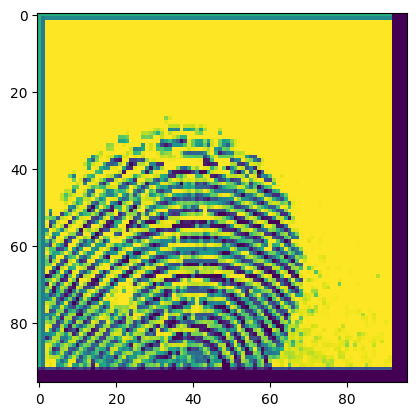

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

# Load the model
model = load_model('GenderFP.h5')

# Load the image to be classified
#img_path = '/content/input/data/Real'
#img = Image.open(img_path).convert('RGB')
#img = img.resize((224, 224))
test_data = loading_data(Real_path,False)
x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)
# Preprocess the image
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

#x = np.array(img, dtype='float32')
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

# Make a prediction

for i in range(20):
  if (y_test[i] >= 1):
    print("Original O/P : Female")
  else:
    print("Original O/P : Male")
    #print('True: ',y_test[i])
  preds = model.predict(np.expand_dims(x_test[i],0))[0]
  if (np.all(preds == 1)):
      print("Predicted O/P : Female")
  else:
      print("Predicted O/P : Male")
  preds = model.predict(np.expand_dims(x_test[i],0))[0]


  # Print the output
  
  print(preds)

  plt.imshow(x_test[i])
  plt.show()
